<a href="https://colab.research.google.com/github/GiangAnhTuan-20146450/Bai-Tap-AI/blob/main/AI_W6_10_03_23.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install scikit-fuzzy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 KB 15.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894086 sha256=1bf398c081962f22ba545895144a93126609a83c5a9af2a8d22ae09971446f35
  Stored in directory: /root/.cache/pip/wheels/32/2c/a1/a90a7d7dd8448ec029f298a61f3490275e99b17aa348be675c
Successfully built scikit-fuzzy


198.20367604348186


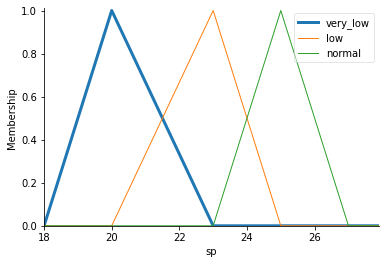

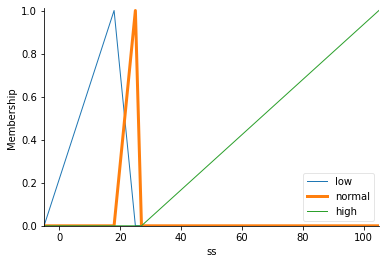

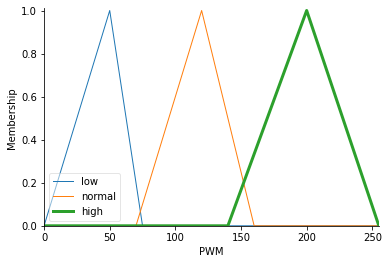

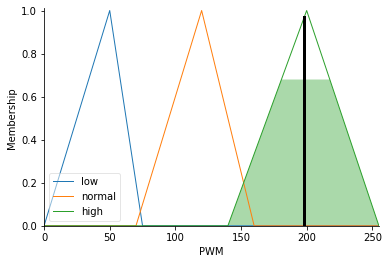

In [ ]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

sp = ctrl.Antecedent(np.arange(18,28,0.1),'sp')
ss = ctrl.Antecedent(np.arange(-5,106,1),'ss')
PWM = ctrl.Consequent(np.arange(0,256,1),'PWM')

sp['very_low']= fuzz.trimf(sp.universe,[18,20,23])
sp['low']= fuzz.trimf(sp.universe,[20,23,25])
sp['normal']= fuzz.trimf(sp.universe,[23,25,27])

ss['low']= fuzz.trimf(ss.universe,[-5,18,25])
ss['normal']= fuzz.trimf(ss.universe,[18,25,27])
ss['high']= fuzz.trimf(ss.universe,[27,105,105])

PWM['low']= fuzz.trimf(PWM.universe,[0,50,75])
PWM['normal']= fuzz.trimf(PWM.universe,[70,120,160])
PWM['high']= fuzz.trimf(PWM.universe,[140,200,255])

sp['very_low'].view()
ss['normal'].view()
PWM['high'].view()

rule1= ctrl.Rule(sp['very_low']&ss['low'],PWM['low'])
rule2= ctrl.Rule(sp['very_low']&ss['normal'],PWM['low'])
rule3= ctrl.Rule(sp['very_low']&ss['high'],PWM['high'])

rule4= ctrl.Rule(sp['low']&ss['low'],PWM['normal'])
rule5= ctrl.Rule(sp['low']&ss['normal'],PWM['low'])
rule6= ctrl.Rule(sp['low']&ss['high'],PWM['high'])

rule7= ctrl.Rule(sp['normal']&ss['low'],PWM['normal'])
rule8= ctrl.Rule(sp['normal']&ss['normal'],PWM['normal'])
rule9= ctrl.Rule(sp['normal']&ss['high'],PWM['high'])

pwm_ctrl= ctrl.ControlSystem([rule1,rule2,rule3,rule4,rule5,rule6,rule7,rule8,rule9])
pwm= ctrl.ControlSystemSimulation(pwm_ctrl)

pwm.input['sp']=20
pwm.input['ss']=80
pwm.compute()
print(pwm.output['PWM'])
PWM.view(sim=pwm)

57.50455927051667
63.30483271375462
10.338199513381996
7.661800486618004


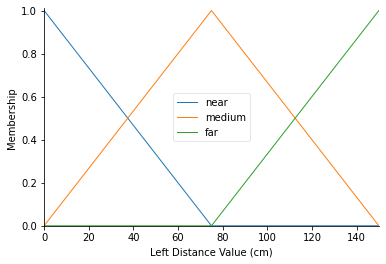

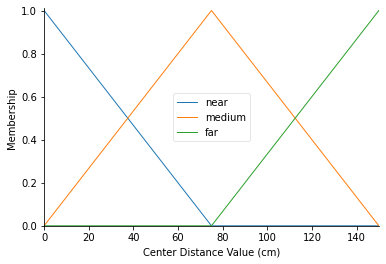

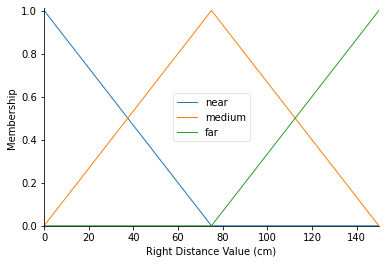

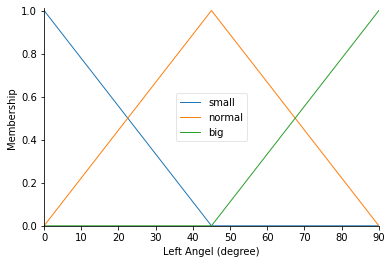

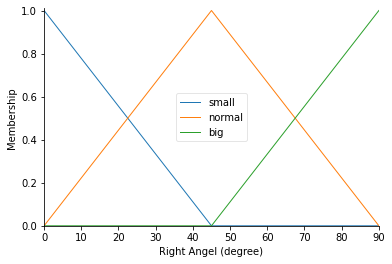

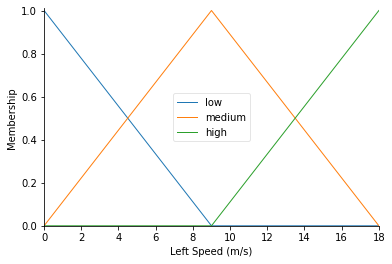

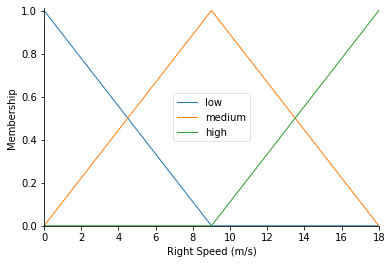

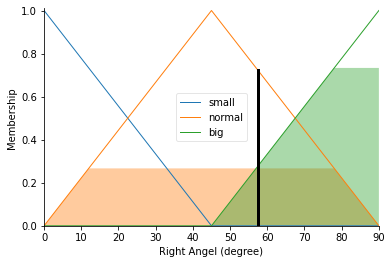

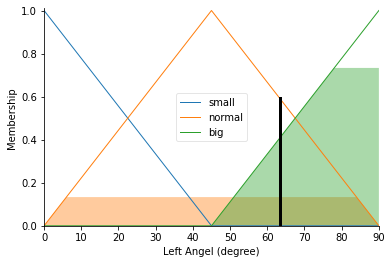

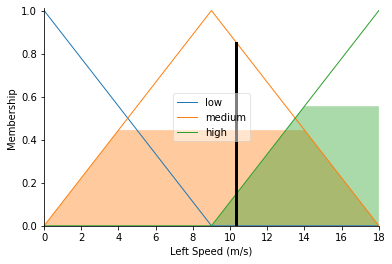

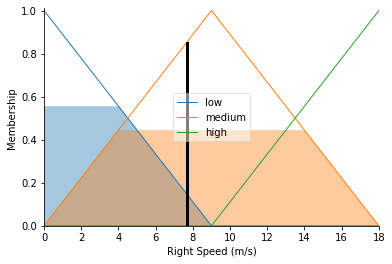

In [ ]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

Left_proximity_sensor = ctrl.Antecedent(np.arange(0,150.1,1),'Left Distance Value (cm)')
Center_proximity_sensor = ctrl.Antecedent(np.arange(0,150.1,1),'Center Distance Value (cm)')
Right_proximity_sensor = ctrl.Antecedent(np.arange(0,150.1,1),'Right Distance Value (cm)')

Left_Angel_Value = ctrl.Consequent(np.arange(0,90.1,1),'Left Angel (degree)')
Right_Angel_Value = ctrl.Consequent(np.arange(0,90.1,1),'Right Angel (degree)')

Left_Speed = ctrl.Consequent(np.arange(0,18.1,1),'Left Speed (m/s)')
Right_Speed = ctrl.Consequent(np.arange(0,18.1,1),'Right Speed (m/s)')

Left_proximity_sensor['near'] = fuzz.trimf(Left_proximity_sensor.universe,[0,0,75])
Left_proximity_sensor['medium'] = fuzz.trimf(Left_proximity_sensor.universe,[0,75,150])
Left_proximity_sensor['far'] = fuzz.trimf(Left_proximity_sensor.universe,[75,150,150])

Center_proximity_sensor['near'] = fuzz.trimf(Left_proximity_sensor.universe,[0,0,75])
Center_proximity_sensor['medium'] = fuzz.trimf(Left_proximity_sensor.universe,[0,75,150])
Center_proximity_sensor['far'] = fuzz.trimf(Left_proximity_sensor.universe,[75,150,150])

Right_proximity_sensor['near'] = fuzz.trimf(Left_proximity_sensor.universe,[0,0,75])
Right_proximity_sensor['medium'] = fuzz.trimf(Left_proximity_sensor.universe,[0,75,150])
Right_proximity_sensor['far'] = fuzz.trimf(Left_proximity_sensor.universe,[75,150,150])

Left_Angel_Value['small'] = fuzz.trimf(Left_Angel_Value.universe,[0,0,45])
Left_Angel_Value['normal'] = fuzz.trimf(Left_Angel_Value.universe,[0,45,90])
Left_Angel_Value['big'] = fuzz.trimf(Left_Angel_Value.universe,[45,90,90])

Right_Angel_Value['small'] = fuzz.trimf(Right_Angel_Value.universe,[0,0,45])
Right_Angel_Value['normal'] = fuzz.trimf(Right_Angel_Value.universe,[0,45,90])
Right_Angel_Value['big'] = fuzz.trimf(Right_Angel_Value.universe,[45,90,90])

Left_Speed['low'] = fuzz.trimf(Left_Speed.universe,[0,0,9])
Left_Speed['medium'] = fuzz.trimf(Left_Speed.universe,[0,9,18])
Left_Speed['high'] = fuzz.trimf(Left_Speed.universe,[9,18,18])

Right_Speed['low'] = fuzz.trimf(Right_Speed.universe,[0,0,9])
Right_Speed['medium'] = fuzz.trimf(Right_Speed.universe,[0,9,18])
Right_Speed['high'] = fuzz.trimf(Right_Speed.universe,[9,18,18])


Left_proximity_sensor.view()
Center_proximity_sensor.view()
Right_proximity_sensor.view()
Left_Angel_Value.view()
Right_Angel_Value.view()
Left_Speed.view()
Right_Speed.view()

rule1 = ctrl.Rule(Left_proximity_sensor['near'] & Center_proximity_sensor['near'], Right_Angel_Value['big'])
rule2 = ctrl.Rule(Left_proximity_sensor['near'] & Center_proximity_sensor['medium'], Right_Angel_Value['big'])
rule3 = ctrl.Rule(Left_proximity_sensor['near'] & Center_proximity_sensor['far'], Right_Angel_Value['normal'])
rule4 = ctrl.Rule(Left_proximity_sensor['medium'] & Center_proximity_sensor['near'], Right_Angel_Value['big'])
rule5 = ctrl.Rule(Left_proximity_sensor['medium'] & Center_proximity_sensor['medium'], Right_Angel_Value['normal'])
rule6 = ctrl.Rule(Left_proximity_sensor['medium'] & Center_proximity_sensor['far'], Right_Angel_Value['small'])
rule7 = ctrl.Rule(Left_proximity_sensor['far'] & Center_proximity_sensor['near'], Right_Angel_Value['big'])
rule8 = ctrl.Rule(Left_proximity_sensor['far'] & Center_proximity_sensor['medium'], Right_Angel_Value['normal'])
rule9 = ctrl.Rule(Left_proximity_sensor['far'] & Center_proximity_sensor['far'], Right_Angel_Value['small'])

rightAngle_ctrl = ctrl.ControlSystem([rule1,rule2,rule3,rule4,rule5,rule6,rule7,
                                   rule8, rule9])

rightAngleValue = ctrl.ControlSystemSimulation(rightAngle_ctrl)

rightAngleValue.input['Left Distance Value (cm)'] = 20
rightAngleValue.input['Center Distance Value (cm)'] = 70
rightAngleValue.compute()
print(rightAngleValue.output['Right Angel (degree)'])
Right_Angel_Value.view(sim=rightAngleValue)

rule10 = ctrl.Rule(Right_proximity_sensor['near'] & Center_proximity_sensor['near'], Left_Angel_Value['big'])
rule11 = ctrl.Rule(Right_proximity_sensor['near'] & Center_proximity_sensor['medium'], Left_Angel_Value['big'])
rule12 = ctrl.Rule(Right_proximity_sensor['near'] & Center_proximity_sensor['far'], Left_Angel_Value['normal'])
rule13 = ctrl.Rule(Right_proximity_sensor['medium'] & Center_proximity_sensor['near'], Left_Angel_Value['big'])
rule14 = ctrl.Rule(Right_proximity_sensor['medium'] & Center_proximity_sensor['medium'], Left_Angel_Value['normal'])
rule15 = ctrl.Rule(Right_proximity_sensor['medium'] & Center_proximity_sensor['far'], Left_Angel_Value['small'])
rule16 = ctrl.Rule(Right_proximity_sensor['far'] & Center_proximity_sensor['near'], Left_Angel_Value['big'])
rule17 = ctrl.Rule(Right_proximity_sensor['far'] & Center_proximity_sensor['medium'], Left_Angel_Value['normal'])
rule18 = ctrl.Rule(Right_proximity_sensor['far'] & Center_proximity_sensor['far'], Left_Angel_Value['small'])

leftAngle_ctrl = ctrl.ControlSystem([rule10,rule11,rule12,rule13,rule14,rule15,rule16,rule17, rule18])
leftAngleValue = ctrl.ControlSystemSimulation(leftAngle_ctrl)

leftAngleValue.input['Right Distance Value (cm)'] = 10
leftAngleValue.input['Center Distance Value (cm)'] = 20
leftAngleValue.compute()
print(leftAngleValue.output['Left Angel (degree)'])
Left_Angel_Value.view(sim=leftAngleValue)

Left_Angel_Value = ctrl.Antecedent(np.arange(0,90.1,1),'Left Angel (degree)')
Right_Angel_Value = ctrl.Antecedent(np.arange(0,90.1,1),'Right Angel (degree)')

Left_Speed = ctrl.Consequent(np.arange(0,18.1,1),'Left Speed (m/s)')
Right_Speed = ctrl.Consequent(np.arange(0,18.1,1),'Right Speed (m/s)')

Left_Angel_Value['small'] = fuzz.trimf(Left_Angel_Value.universe,[0,0,45])
Left_Angel_Value['normal'] = fuzz.trimf(Left_Angel_Value.universe,[0,45,90])
Left_Angel_Value['big'] = fuzz.trimf(Left_Angel_Value.universe,[45,90,90])

Right_Angel_Value['small'] = fuzz.trimf(Right_Angel_Value.universe,[0,0,45])
Right_Angel_Value['normal'] = fuzz.trimf(Right_Angel_Value.universe,[0,45,90])
Right_Angel_Value['big'] = fuzz.trimf(Right_Angel_Value.universe,[45,90,90])

Left_Speed['low'] = fuzz.trimf(Left_Speed.universe,[0,0,9])
Left_Speed['medium'] = fuzz.trimf(Left_Speed.universe,[0,9,18])
Left_Speed['high'] = fuzz.trimf(Left_Speed.universe,[9,18,18])

Right_Speed['low'] = fuzz.trimf(Right_Speed.universe,[0,0,9])
Right_Speed['medium'] = fuzz.trimf(Right_Speed.universe,[0,9,18])
Right_Speed['high'] = fuzz.trimf(Right_Speed.universe,[9,18,18])

rule19 = ctrl.Rule(Left_Angel_Value['big'] & Right_Angel_Value['big'], [Left_Speed['low'],Right_Speed['low']])
rule20 = ctrl.Rule(Left_Angel_Value['big'] & Right_Angel_Value['normal'], [Left_Speed['low'],Right_Speed['high']])
rule21 = ctrl.Rule(Left_Angel_Value['big'] & Right_Angel_Value['small'], [Left_Speed['low'],Right_Speed['medium']])
rule22 = ctrl.Rule(Left_Angel_Value['normal'] & Right_Angel_Value['big'], [Left_Speed['high'],Right_Speed['low']])
rule23 = ctrl.Rule(Left_Angel_Value['normal'] & Right_Angel_Value['normal'],[Left_Speed['medium'],Right_Speed['medium']])
rule24 = ctrl.Rule(Left_Angel_Value['normal'] & Right_Angel_Value['small'], [Left_Speed['low'],Right_Speed['medium']])
rule25 = ctrl.Rule(Left_Angel_Value['small'] & Right_Angel_Value['big'], [Left_Speed['medium'],Right_Speed['low']])
rule26 = ctrl.Rule(Left_Angel_Value['small'] & Right_Angel_Value['normal'],[Left_Speed['medium'],Right_Speed['low']])
rule27 = ctrl.Rule(Left_Angel_Value['small'] & Right_Angel_Value['small'], [Left_Speed['high'],Right_Speed['high']])

leftSpeed_ctrl = ctrl.ControlSystem([rule19,rule20,rule21,rule22,rule23,rule24,rule25,rule26, rule27])
rightSpeed_ctrl = ctrl.ControlSystem([rule19,rule20,rule21,rule22,rule23,rule24,rule25,rule26, rule27])

leftSpeeding = ctrl.ControlSystemSimulation(leftSpeed_ctrl)
rightSpeeding = ctrl.ControlSystemSimulation(rightSpeed_ctrl)

leftSpeeding.input['Left Angel (degree)'] = 55
leftSpeeding.input['Right Angel (degree)'] = 30
rightSpeeding.input['Left Angel (degree)'] = 45
rightSpeeding.input['Right Angel (degree)'] = 70
leftSpeeding.compute()
rightSpeeding.compute()
print(leftSpeeding.output['Left Speed (m/s)'])
print(rightSpeeding.output['Right Speed (m/s)'])
Left_Speed.view(sim=leftSpeeding)
Right_Speed.view(sim=rightSpeeding)